<a href="https://colab.research.google.com/github/mr-ayush-agrawal/DL_Notebooks/blob/main/Lect/CNN_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pooling operation
Here we are seeing how pooling operation works, the reference video is same from the playlist, and Notes are in Notion

In [1]:
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import Sequential
from keras.datasets import mnist

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [54]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model1.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))
model1.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))
model1.add(Conv2D(16, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))
k
model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))

In [55]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 16)          4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 16)         

In [56]:
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
model1.fit(
    x_train, y_train,
    epochs = 5,
    validation_split = 0.3,
    batch_size = 5000
)

Epoch 1/5
9/9 [==============================] - 34s 3s/step - loss: 8.8461 - accuracy: 0.1030 - val_loss: 3.4609 - val_accuracy: 0.1265
Epoch 2/5
9/9 [==============================] - 32s 4s/step - loss: 2.8534 - accuracy: 0.1588 - val_loss: 2.2447 - val_accuracy: 0.1966
Epoch 3/5
9/9 [==============================] - 34s 4s/step - loss: 2.1353 - accuracy: 0.2395 - val_loss: 1.9012 - val_accuracy: 0.3309
Epoch 4/5
9/9 [==============================] - 45s 5s/step - loss: 1.7992 - accuracy: 0.3745 - val_loss: 1.6035 - val_accuracy: 0.4562
Epoch 5/5
9/9 [==============================] - 33s 4s/step - loss: 1.4868 - accuracy: 0.4945 - val_loss: 1.2843 - val_accuracy: 0.5694


In [58]:
pre = model1.predict(x_test)

313/313 [==============================] - 3s 11ms/step


In [59]:
import numpy as np

In [60]:
pre = np.argmax(pre, axis =1)

In [61]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [63]:
mat = confusion_matrix(y_test, pre)

In [64]:
from seaborn import heatmap
import matplotlib.pyplot as plt

<Axes: >

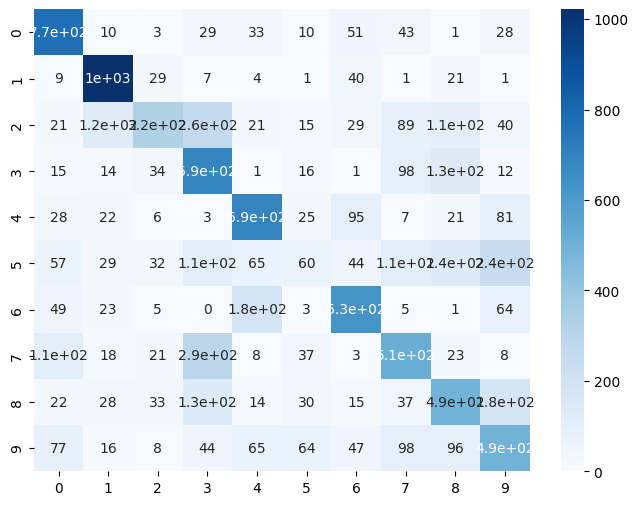

In [65]:
plt.figure(figsize = (8, 6))
heatmap(mat, cmap = 'Blues', annot = True)

In [66]:
accuracy_score(y_test, pre)

0.5682